In [9]:
library(ggbiplot)
library(factoextra)
library(NbClust)
library(FunCluster)
library(pca3d)
library(e1071)
library(poLCA)
library(reshape2)

In [10]:
s123 <- read.csv("C:\\Users\\marpr\\Desktop\\docto\\respuestas-s123 - copia.csv", sep=',')
s123 <- data.frame(s123)
s1 <- s123[,1:4]
s3 <- s123[,5:7]
s2 <- s123[,8:9]
s1 = data.frame(rank(s1$s1.High), rank(s1$s1.Medium.High), rank(s1$s1.Medium.Low), rank(s1$s1.Low))
s3 = data.frame(rank(s3$S3.1), rank(s3$S3.2), rank(s3$S3.3))
s2 = data.frame(rank(s2$s2.Relatively.High), rank(s2$s2.Relatively.Low))


Component loadings:
                            Comp.1      Comp.2     Comp.3      Comp.4
rank.s1.s1.High.         0.5974981  0.20022607  0.3359350  0.70003798
rank.s1.s1.Medium.High. -0.1262262 -0.88534265  0.4176943  0.16052052
rank.s1.s1.Medium.Low.  -0.6096510  0.03277043 -0.3815005  0.69405267
rank.s1.s1.Low.         -0.5053598  0.41833481  0.7530847 -0.04970802

Component variances:
   Comp.1    Comp.2    Comp.3    Comp.4 
2.2764892 1.1369193 0.3864161 0.2001755 

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4
Standard deviation     1.5088039 1.0662642 0.62162375 0.44740976
Proportion of Variance 0.5691223 0.2842298 0.09660402 0.05004387
Cumulative Proportion  0.5691223 0.8533521 0.94995613 1.00000000


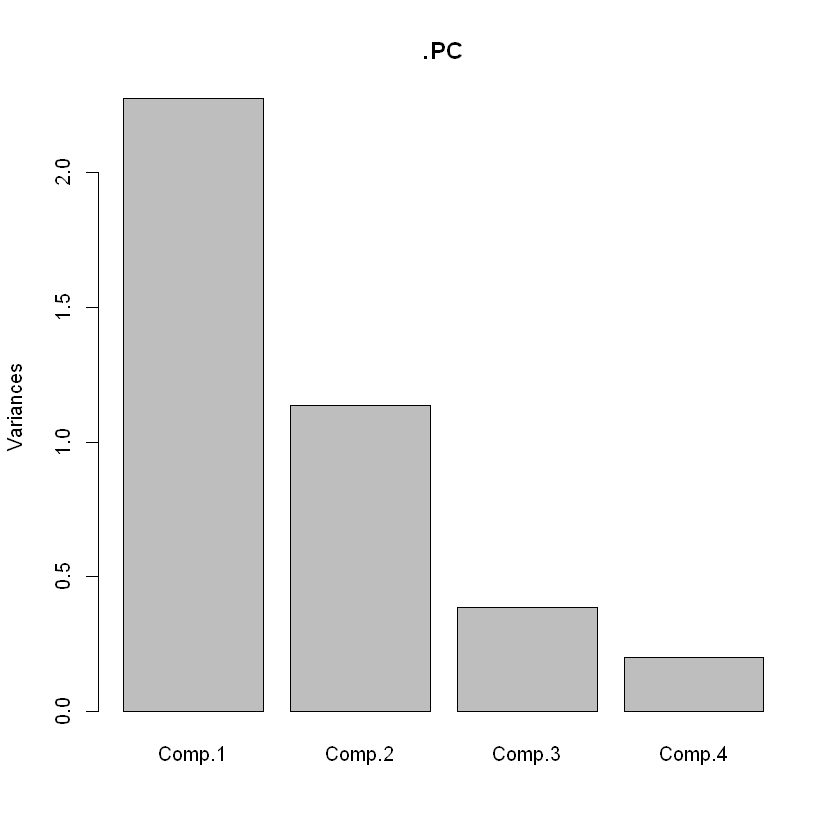

In [11]:
.PC <- princomp(s1, cor=TRUE)
cat("\nComponent loadings:\n")
print(unclass(loadings(.PC)))
cat("\nComponent variances:\n")
print(.PC$sd^2)
cat("\n")
print(summary(.PC))
screeplot(.PC)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


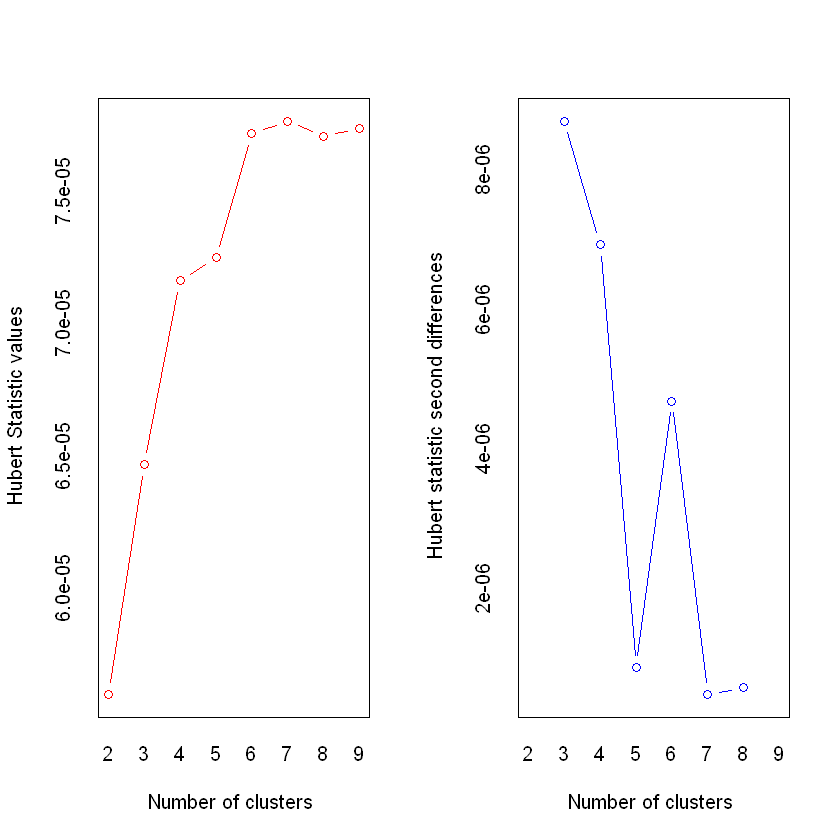

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 3 proposed 2 as the best number of clusters 
* 11 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 3 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


$subtitle
[1] "A ver statistic method"

attr(,"class")
[1] "labels"

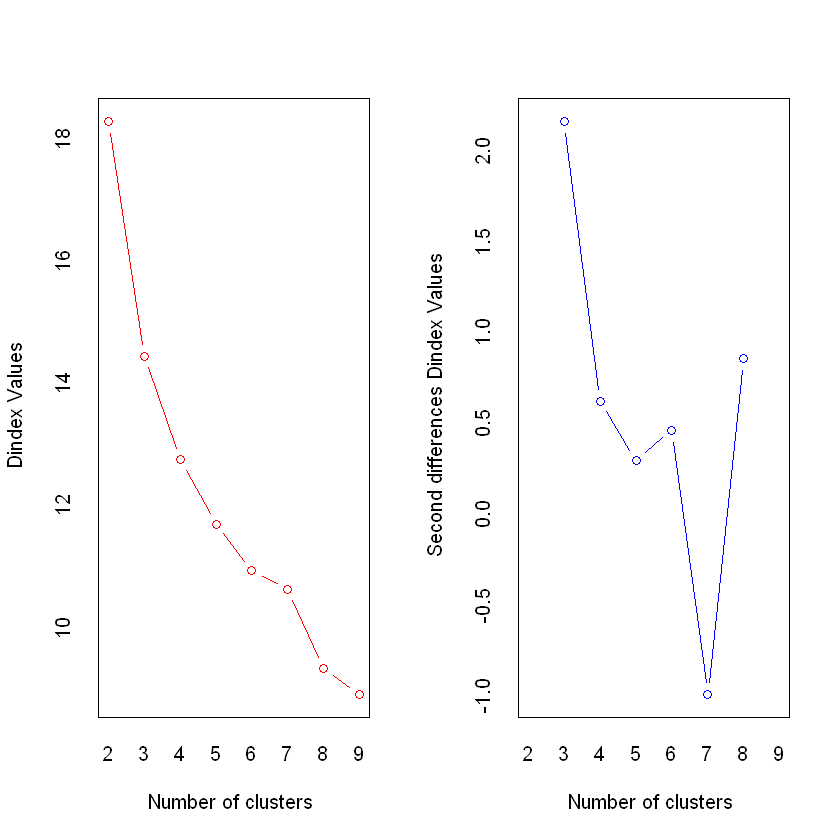

In [5]:
cl_s1 <- NbClust(s1, distance = "euclidean",
        min.nc = 2, max.nc = 9, method = "kmeans", index = "all")
        labs(subtitle = "A ver statistic method")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


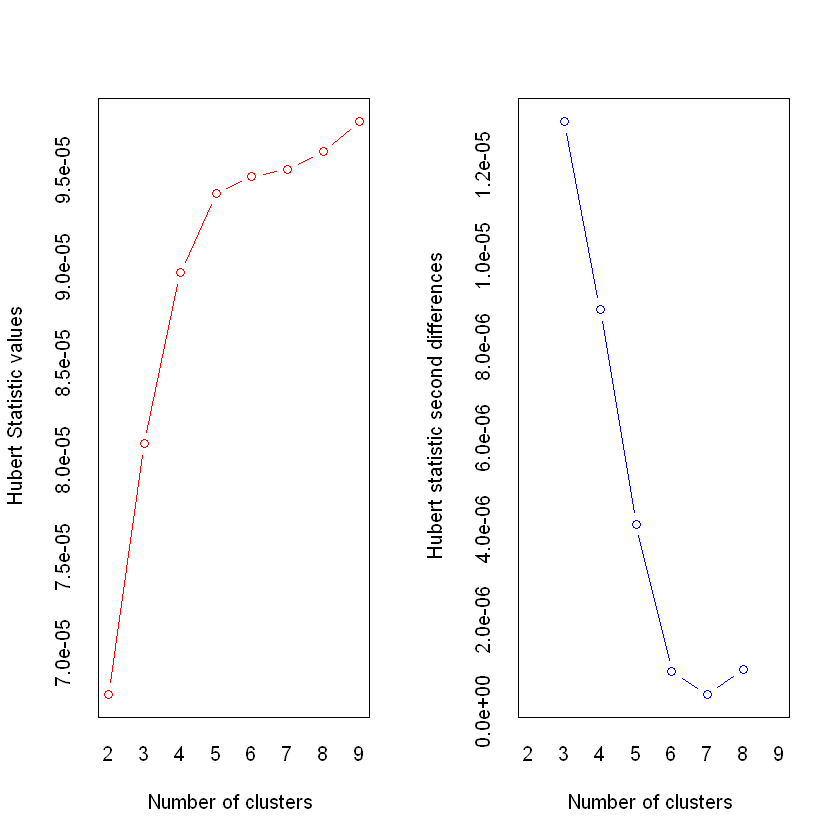

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 7 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 3 proposed 6 as the best number of clusters 
* 3 proposed 8 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


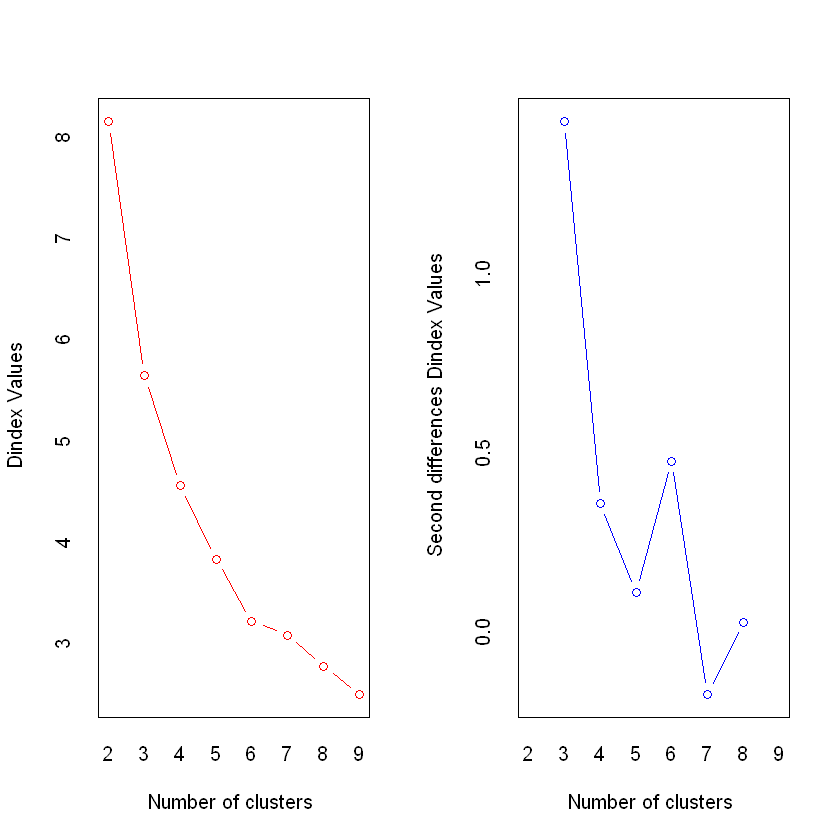

In [6]:
cl_s2 <- NbClust(s2, distance = "euclidean",
        min.nc = 2, max.nc = 9, method = "kmeans", index = "all")#  c("ward.D", "ward.D2", "single", "complete", "average", "kmeans", "centroid"))
#         labs(subtitle = "A ver statistic method")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


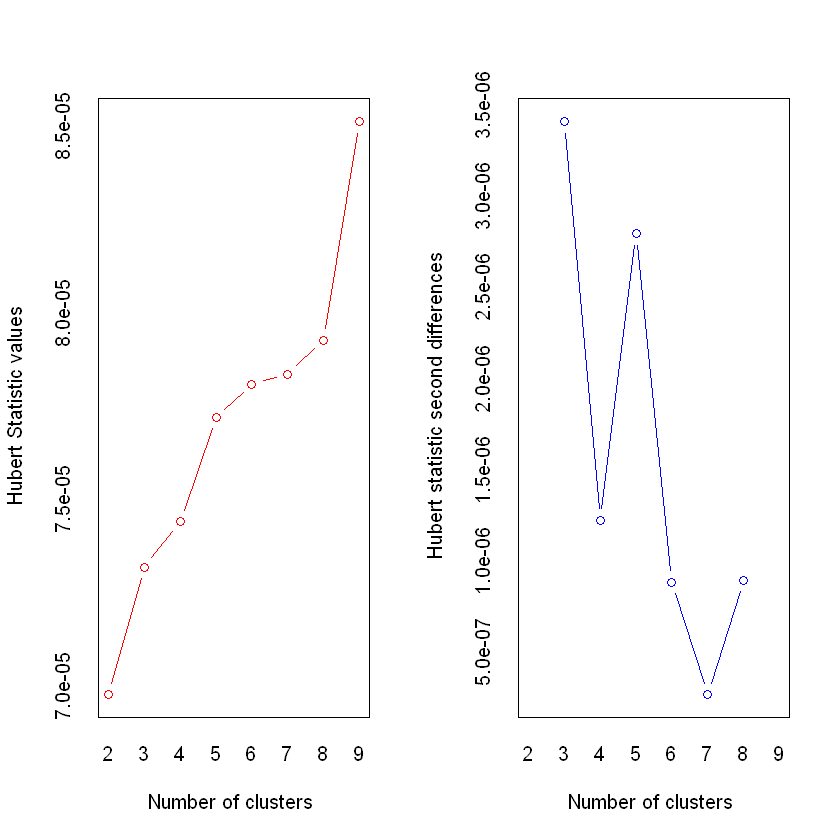

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 2 as the best number of clusters 
* 11 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


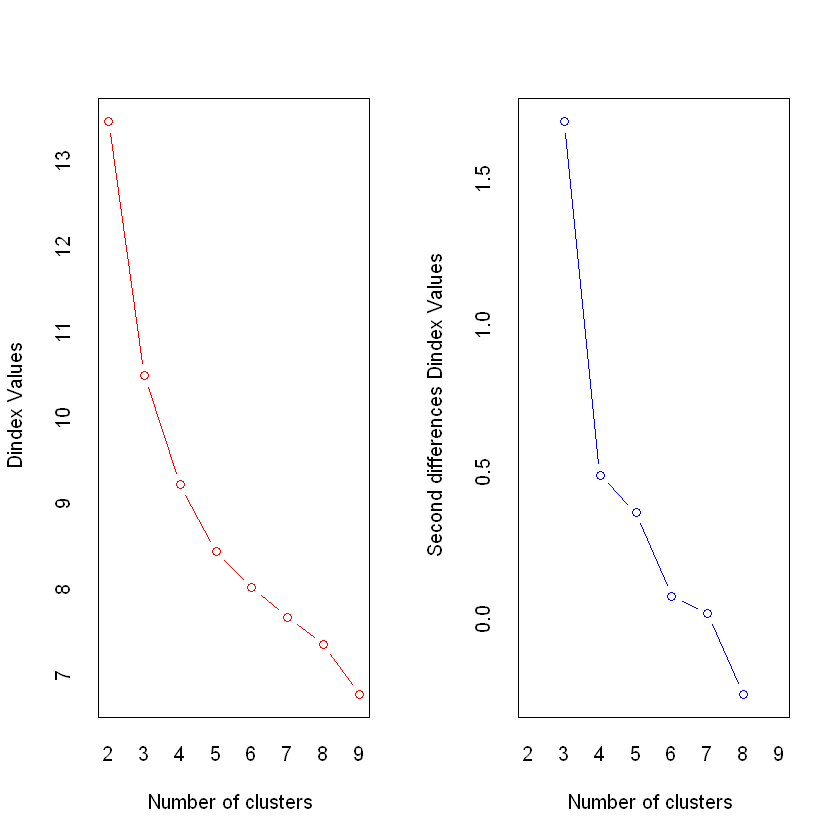

In [7]:
cl_s3 <- NbClust(s3, distance = "euclidean",
        min.nc = 2, max.nc = 9, method = "kmeans", index = "all")#c("ward.D", "ward.D2", "single", "complete", "average", "kmeans", "centroid"))
#         labs(subtitle = "A ver statistic method")
all <- cl_s3$All.index